# Data Visualization

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plotlyset up
import plotly.offline as py
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
# packages for word cloud
from wordcloud import WordCloud,ImageColorGenerator
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# import datasets
df = pd.read_csv('Data/cleaned-data.csv')
train = pd.read_csv('Data/Row-data/train.csv')

In [3]:
# drop unuseful columns for visualization
df = df.drop(['DataType','Description','PetID'], axis = 1)
train = train.drop(['Quantity','PhotoAmt','VideoAmt','State'], axis = 1)

/Users/elainny/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



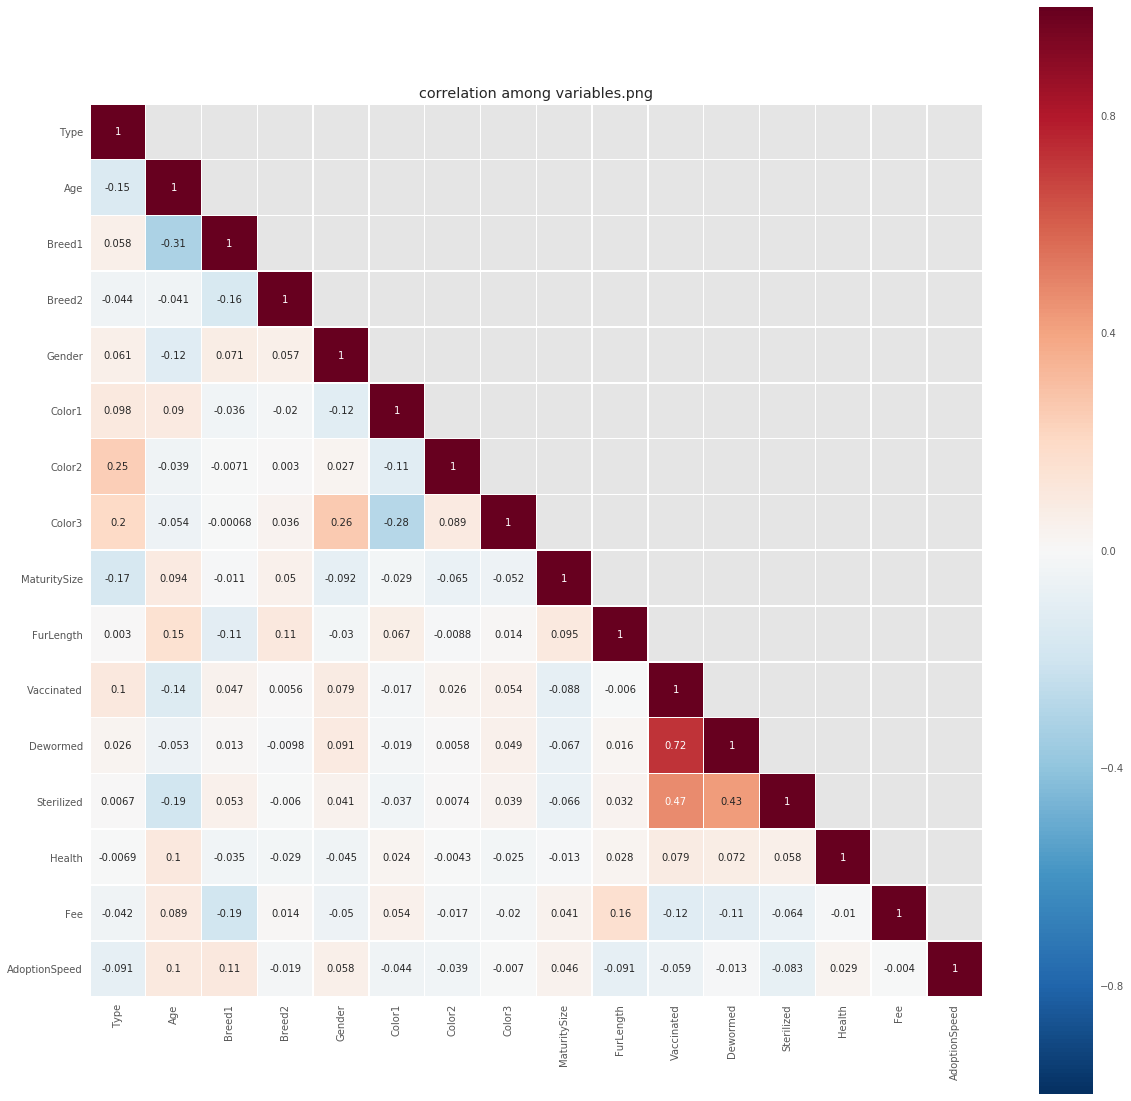

In [4]:
# Correlation among variables
# get some idea of top 3 variables I am going to analyze more than other variables
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(corr)] = False
sns.heatmap(data=corr,mask=mask,annot=True,linewidths=.5,square=True)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.title('correlation among variables.png')
plt.savefig("correlation-among-variables.png", bbox_inches="tight", dpi=100)
plt.show() 

In [5]:
#Adoption Speed vs Age plot
import plotly
tls.set_credentials_file(username='wawafish',api_key='haNTorCiWdKfafDOiZCh')

data_age = []
for i in range(5):
    datax = df.loc[df['AdoptionSpeed'] == 2]
    data = df.loc[df['AdoptionSpeed'] == i]
    data_age.append(go.Scatter(
        x = datax['Age'].value_counts().sort_index().index,
        y = data['Age'].value_counts().sort_index().values,
        mode = str(i),
        name = str(i)))
    

layout = dict(title = 'Adoption Speed vs Age',
              yaxis = dict(title = 'Count', zeroline = False),
              xaxis = dict(title = 'Age in months', zeroline = False))

fig = dict(data=data_age, layout = layout)
py.iplot(fig, filename = 'basic-line')

In [6]:
# Total Adoption Speed
import plotly
tls.set_credentials_file(username='wawafish',api_key='haNTorCiWdKfafDOiZCh')

labels = ['Not being adopted','adopted within 2-3 months','adopted within 1st month',
          'adopted within 1st week','same day adoption']
values = list(df['AdoptionSpeed'].value_counts())
colors = ['#ffe6e6', '#fcf8c1', '#defcce', '#e9dbf9','#ceeef9']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors))

py.iplot([trace], filename='styled_pie_chart')

In [7]:
# Top 7 popular combinations of gender and type
df['Color'] = (df['Color1'] + '/' + df['Color2'] + '/' + df['Color3']).replace(['//'], [' '])
for i in df['Type'].unique():
    for gender in df['Gender'].unique():
        data_color = df.loc[(df['Type'] == i) & (df['Gender'] == gender)]
        top7_colors = list(data_color['Color'].value_counts().index)[:7]
        print(f"Top 5 popular colors of {gender} {i}s: {' '.join(top7_colors)}")

Top 5 popular colors of Male Cats: Black/White/none Black/none/none Gray/White/none White/none/none Yellow/White/none Black/Gray/White Golden/none/none
Top 5 popular colors of Female Cats: Black/White/none Black/Brown/White Black/Yellow/White Gray/White/none White/none/none Gray/none/none Black/Gray/White
Top 5 popular colors of Neutered/Sprayed Cats: Black/Brown/White Black/Gray/White Black/Yellow/White Black/White/none Black/Golden/White Black/Cream/White Black/Brown/Gray
Top 5 popular colors of Male Dogs: Brown/none/none Black/Brown/none Brown/White/none Black/none/none Black/White/none Black/Brown/White Cream/none/none
Top 5 popular colors of Female Dogs: Brown/none/none Black/Brown/none Brown/White/none Black/none/none Black/White/none Black/Brown/White Cream/none/none
Top 5 popular colors of Neutered/Sprayed Dogs: Black/Brown/White Black/Brown/none Black/Brown/Cream Brown/none/none Black/White/none Brown/Cream/White Brown/White/none


/Users/elainny/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



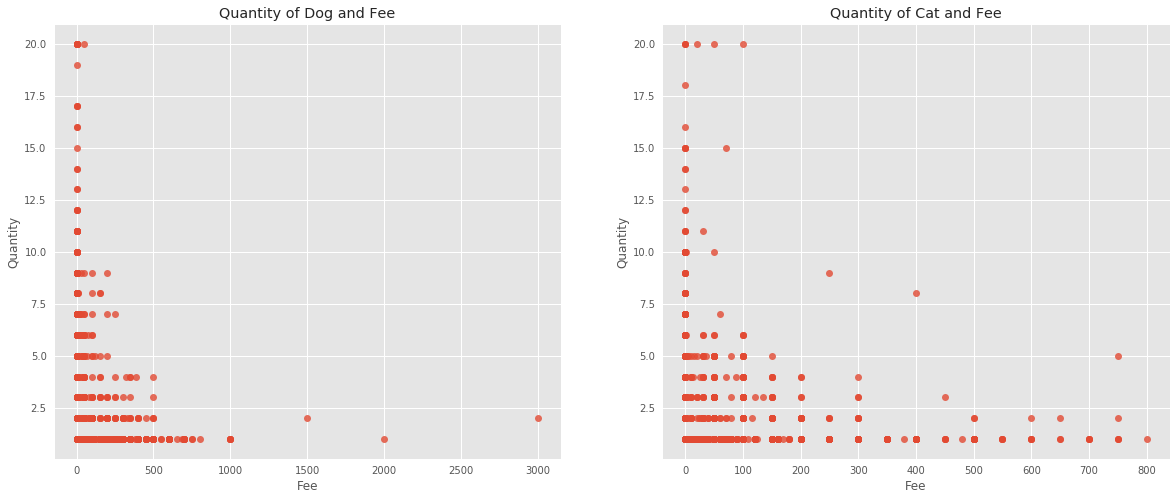

In [8]:
# plot for quantity vs fee
import seaborn as sns 
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Dog'], fit_reg=False)
plt.title('Quantity of Dog and Fee');

plt.subplot(1, 2, 2)
sns.regplot(x="Fee", y="Quantity",data=df.loc[df['Type'] == 'Cat'], fit_reg=False)
plt.title('Quantity of Cat and Fee');

plt.savefig('quantity-vs-fee.png')
plt.show()

## word cloud

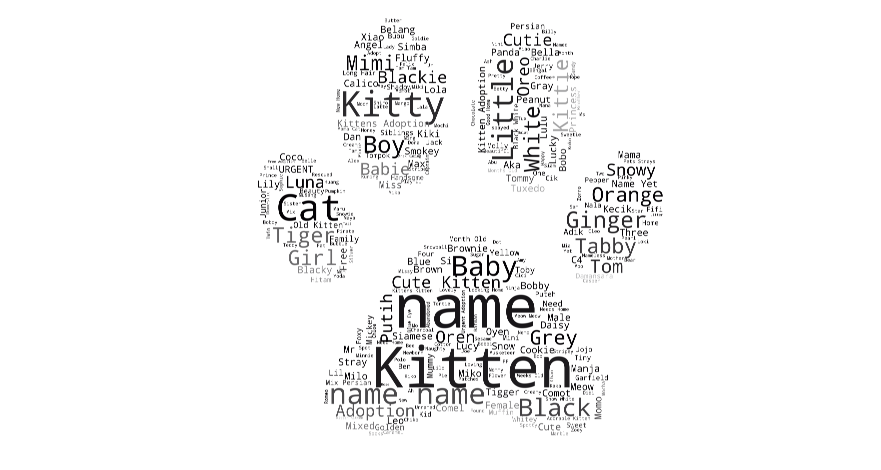

In [9]:
# word cloud: cat name
plt.figure(figsize=(20, 8))
bg_pic = imread('dog-paw.png')
image_colors = ImageColorGenerator(bg_pic)


cat_name = ' '.join(df.loc[df['Type'] == 'Cat', 'Name'].fillna('').values)
wc_cat = WordCloud(mask=bg_pic,background_color='white',scale=20,max_words=300).generate(cat_name)

plt.imshow(wc_cat.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('cat.png')
#plt.show()

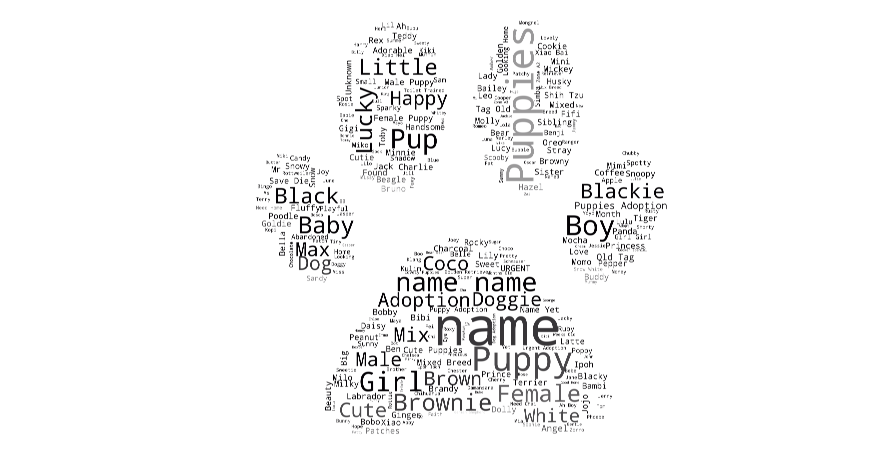

In [10]:
# word cloud: dog name
plt.figure(figsize=(20, 8))
dog_name = ' '.join(df.loc[df['Type'] == 'Dog', 'Name'].fillna('').values)
wc_dog = WordCloud(mask=bg_pic,background_color='white',scale=20,max_words=300).generate(dog_name)
plt.imshow(wc_dog.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('dog.png')
plt.show()

In [11]:
# top 3 popular pet names sorted by adoption speed
print('Top 3 Most popular pet names and AdoptionSpeed: ')
for name in df['Name'].value_counts().index[:3]:
    print('top 3 names: %s' % name)
    print(df.loc[df['Name'] == name, 'AdoptionSpeed'].value_counts().sort_index())

Top 3 Most popular pet names and AdoptionSpeed: 
top 3 names: No name
0.0     26
1.0    271
2.0    312
3.0    216
4.0    432
Name: AdoptionSpeed, dtype: int64
top 3 names: Baby
0.0     2
1.0    11
2.0    15
3.0    11
4.0    27
Name: AdoptionSpeed, dtype: int64
top 3 names: Lucky
0.0     5
1.0    14
2.0    16
3.0    12
4.0    17
Name: AdoptionSpeed, dtype: int64


In [12]:
# pets without names vs adoption speed
df['No_name'] = 0
df.loc[df['Name'] == 'No name', 'No_name'] = 1

pd.crosstab(df['No_name'], df['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
No_name,,,,,
0,0.027956,0.205227,0.271185,0.221535,0.274097
1,0.020684,0.215593,0.248210,0.171838,0.343675


In [13]:
# the following pet names will have less possibility to be adopted.
less_adoption_name = []
for name in df['Name'].unique():
    if len(str(name)) <=3:
        less_adoption_name.append(name)

print(less_adoption_name)

['Max', 'Tom', 'Boy', 'H3', 'Zoe', 'Z3', 'C', 'Cat', 'BB', 'QQ', 'Y1', 'Sam', 'Mok', 'H1', 'C7C', 'D9', 'R11', 'Tea', 'Y4', 'LEO', 'KFC', 'Leo', 'Z4', 'B33', 'Ice', 'DD', 'Mia', 'M2', 'H6', 'D4', 'Iko', 'Gia', 'Ash', 'JJ', 'Kid', 'Rin', 'Dom', 'Ben', 'F1', 'W7', 'Mio', 'C2C', 'Abe', 'Lai', 'L17', 'May', 'C5C', 'Liz', 'Bee', '1F', 'Dot', 'Q1', 'Any', 'Gin', 'Got', '6', 'Ray', 'CJ', '3F', 'KD', 'Chi', 'G1', 'Ali', 'Min', 'AB1', 'Abu', 'Ace', 'Zee', 'Gon', 'Abi', 'Sel', 'B3', 'Cc', 'F6', 'Mk', 'Cha', 'A5', 'Jet', 'Ted', 'Blu', 'Amy', 'Niu', 'Non', 'Jay', 'BT8', 'GM', 'Wes', 'Mou', 'D5', 'Aki', 'Mei', 'EE', 'Poe', 'Uyu', 'A4', 'Q4', 'BLU', 'Jim', 'B', 'Kin', 'Lex', 'CC', 'S&P', 'Mex', 'BOY', 'Mac', 'Rum', 'BEE', 'Ami', 'TOM', 'Eli', 'Y7', 'R12', 'Tim', 'Nil', 'W6', 'A3', 'R10', 'Gus', 'Jr.', 'A1', 'Pup', 'T1', 'W1', 'Eva', 'M4', 'Mec', 'P5', 'Dio', 'H2', 'GG', 'Joy', 'Y6', '!!.', 'Rio', 'Joe', 'Mog', 'Ori', 'Z', 'D7', 'B4', 'Jil', 'Ino', 'AB2', 'C2', 'M8', '3', 'Hua', 'G2', 'Tam', 'ML', '.